<div class="alert-warning" style="font-size:250%">
Design a plagarism detector
</div>


# Q1

***Rolling hash*** 

In [19]:
collisions = 0

In [45]:
#Modification of the ahsh table provided in the reading (Nguyen & Tran, 2021)
#collisions = 0

class HashTable:
    def __init__(self, m):
        self.m = m
        self.hash_table = [None for _ in range(m)]
        #print(m)
    
    def chained_hash_insert(self, key, value):
        """
        Inserts the given values into the hash table 
        
        Imput:
            - key: hashed key
            - value: list inclusing substring and index in the original string
            
        Output:
            - None
        """
        #create the node to store our key and value
        node = HashTableNode(key, value)
        if self.hash_table[key] is not None:
            global collisions
            collisions += 1
        #if there already exists another node, add the current node on top
            node.next = self.hash_table[key]
            self.hash_table[key] = node
        else:
            self.hash_table[key] = node
    
    def chained_hash_search(self, key, value):
        """
        Determins if there's a match between the values on the hash table and  the imput
        and returns either false or the value.
        
        Imput:
            - key: hashed key
            - value: list inclusing substring and index in the original string
            
        Output:
            - False if there's no result found
            - Value of the match in the table (if match is found)
        """
        #find the key after hashing
        hashed_key = key
        #print(hashed_key)
        #start traversing from this node
        cur = self.hash_table[key]
        #traversing the list to find the value
        while cur is not None:
            if cur.key == key:
                if cur.value[0] == value:
                    #true returen the value where the index for the list is stored
                    #print(cur.value)
                    return cur.value
            
            cur = cur.next
        return False

class HashTableNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
        
#has_table = HashTable(200)
test = []

#based of the rabin karp algorithm found at (Cormen et al., 2009 & 
#(Rabin-Karp Algorithm for Pattern Searching - GeeksforGeeks, 2011))
def rolling_hash_function(hash_table,string,k, q, comp):
    #add an extra parameter for teh different treaties for the comperison
    """
    Divides the strings into substrings, and either inserts them ito the table after 
    determining it's hash value r perfoms the search with the corresponding 
    hash value for the comperiso
    Input:
        hash_table = hash table whete to insert the values
        k =subdivison
        q - val use to calculate hashing (please be more specific!!)
        string = the string
        comp = is the comperison being done using that string (i.e, table already filled)
    """

    l = len(string)
    s = 0
    #Value use for the updates, can alos use
    #(10**9)+9 as the value to update (aka q)
    h = 1
    #letters in taht alphabet
    d= 300

    #sets h as the last posible value (to latter perform teh updates)
    for i in range(k-1):
        h = (h*d) % q
        #print("h", h)

    # iterate trhu the len of the string
    for i in range(k):
        s = (d*s + ord(string[i])) % q

    #list to store the comperisons
    pair = []
    #performs sub-divisions and update the hash
    for i in range(l-k+1):
        #determine if the value will be inserted in the table or 
        #perform search
        if comp == False:
            #print("howw")
            val = string[i: i+k]
            hash_table.chained_hash_insert(s,[val , i])
            test.append([s,[string[i: i+k],i]])
        elif comp == True:
            #print("muju")
            search = hash_table.chained_hash_search(s,string[i: i+k])
            #print(search)
            if search != False:
                #print("could be here")
                #the value of the return should be the list with the substring and the position
                pair.append((search[1], i))
                #test.append([s,string[i: i+k]])
        if i < l-k:
            #updating the has (aka, rolling hash property)
            s = (d*(s-ord(string[i])*h) + ord(string[i+k])) % q
            #avoids negatib=ve hashing values
            if s < 0:
                s = s+q
    if comp == True:
        return pair

#rolling_hash_function("holacomo",3, 100, True)
#print(test)
#print(has_table.hash_table)
#print(has_table.chained_hash_search(11, ['omo', 5]))

def rh_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    
    Input:
        -x, y: strings
        -k: lenght of the substrings
    
    Output:
        -A list of tuples (i,j) where x[i:i + k = y[j: j+k]]
    """
    #No size of substring
    if k == 0 or x == "" or y == "":
        return []
    #Find the appropiate lenght of the has table depending on the lenght of teh string
    #can be less (but be over sure)
    m = (len(x)//k)*7
    #given that q indicates teh possible indices for the hashing it will have the same value as m
    q = m
    #inizialize the table
    roll_hash_table = HashTable(m)
    #store all the tuples
    #the division into substrings is done in the hashing function (to maximize benefitts of rolling hash)
    #Fill the hash table
    #comp indicates if its the original string or the one we are performing comperisons with
    rolling_hash_function(roll_hash_table,x, k, q, False)
    #perform the comperions
    pairs = rolling_hash_function(roll_hash_table, y , k, q, True)
    #print(roll_hash_table.hash_table)
    #print(test)
    return pairs
    
#Tests

#Test 1: Basic conditions to determine if it accomplish it's purpose
x= "thisisatest"
y = "sat"
k = 3
assert(rh_get_match(x, y, k) == [(5, 0)])

#Test 2: Determine if it can differentiate between upper and lower letters
x= "thisisatest"
y = "SAT"
k = 3
assert(rh_get_match(x, y, k) == [])

#Test 3: Handeling empty strings
x= "thisisatest"
y = ""
k = 3
assert(rh_get_match(x, y, k) == [])


#Test 4: Size of sub-string == 0
x= "thisisatest"
y = "sat"
k = 0
assert(rh_get_match(x, y, k) == [])
collisions = 0




##### Justification for the code

Given that we want to divide the string into sub-segments with size z while still performing the hashing, the best approach will be to use a modification of the Rabin-Karp algorithm that performs comparisons of a string with a pattern and returns the index of the substring (while using the benefits of updating the hashing algorithm). Because we are performing rolling hashing, the hashing function has to be continuous; thus, I modified the hashing table and used the rolling hash the helper function that will insert the value of the string (to perform comparisons in case that it was a collision and not the same actual value when the comparisons are made) and the index (so I could return the tuple with teh proper information, without the need to repeat the same calculation; because we know the index of the list in which value is it doesn't increase the time complexity of the search function significantly). 
For the hashing table size (taking into account that we would want to minimize the size, to use less memory while also minimizing the number of collisions and thus the time complexity), so to determine the size, the function divides the length of the string by the size of the substring to obtain the number of buckets we would need if it was a perfect fit and multiplying it by a prime number (thus allowing that the prime number increases the probabilities of a hash table that will include all the indexes, and given that we use the same value for q, creates unique divisions). As mentioned before, the value q uses the same size as the length of the table because q determines the index on the table; thus, we want it to be as spread out in the table as possible (e.g., using the strings "x= "hellothisisatest" and y = "yepevenifitchangesitsatest" with k = 3, when the q value is a single prime number like 7 the collisions are 12, but when we determine q on a case by case bases using the hash table size as a reference, q = table size, we reduce the collisions to 2.
To create the hash table itself, I modified the hash table "skeleton" provided in the reading so it would fit my particular use when the input was the already hash table. I decided to use the chaining method when dealing with collisions (i.e., using a linked list to store values with the same key) because even when it can increase the time complexity when there are multiple collisions, we don't need to resize the table (which is particularly problematic because our q value is dependent on the table size) and as long we keep the loading factor relatively low; it will be more effective than probing (which requires multiple extra operations to determine which slots of the table are still free). It is written as a class so I can reuse it for the other hashing methods(thus reducing the amount of repetitive code).


# Q2

***Other hash*** 

In [46]:
test = []

#3 middle numbers
def middle(num):
    """
    Returns the middle numbers of a longer number
    Input:
    - num - number to be devided
    
    Output:
    - three digit number
    """
    #If the number is less than 3 we wont be abble to divided it
    if len(str(num)) <= 3:
        return num
    s = str(abs(num))
    leng = len(s)
    mid = leng // 2
    return int(s[mid-1:mid+2])

#My hash function
def mid_hash(string):
    """
    Performs mid hashing function on the corresponding string
    
    Input
    """
    s = 0
    #random depending on the lenght of the table
    for char in string:
        #elemets of the mid-square method
        s += ord(char)
    for i in range(3):
        s = (middle(s))^2
    return int(s)

def hash_string(hash_table,string,k, comp):
    l = len(string)
    #list to store the comperisons
    pair = []
    #performs sub-divisions and update the hash
    for i in range(l-k+1):
        #determine if the value will be inserted in the table or 
        #perform search
        if comp == False:
            #print("howw")
            val = string[i: i+k]
            hash_table.chained_hash_insert(mid_hash(val),[val , i])
            #test.append([mid_hash(val),[string[i: i+k],i]])
        elif comp == True:
            #print("muju")
            val = string[i: i+k]
            search = hash_table.chained_hash_search(mid_hash(val),string[i: i+k])
            #print(search)
            if search != False:
                #print("could be here")
                #the value of the return should be the list with the substring and the position
                pair.append((search[1], i))
                #test.append([s,string[i: i+k]])
    if comp == True:
        return pair
    
def regular_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    
    Input:
        -x, y: strings
        -k: lenght of the substrings
    
    Output:
        -A list of tuples (i,j) where x[i:i + k = y[j: j+k]]
    """
    #No size of substring
    if k == 0 or x == "" or y == "":
        return []
    #Set lenght given the nature of the hash (detail explination below)
    m = 1001
    #minimize the value of q, to avoid integer overflow
    #inizialize the table
    regular_hash_table = HashTable(m)
    #store all the tuples
    #the division into substrings is done in the hashing function (to maximize benefitts of rolling hash)
    #Fill the hash table
    #comp indicates if its the original string or the one we are performing comperisons with
    hash_string(regular_hash_table,x, k, False)
    #perform the comperions
    pairs = hash_string(regular_hash_table, y , k, True)
    #print(roll_hash_table.hash_table)
    #print(test)
    return pairs

#Use of the same tests given that even when it's a different implementation both hashing tables should have the same
#functionality

#Tests

#Test 1: Basic conditions to determine if it accomplish it's purpose
x= "thisisatest"
y = "sat"
k = 3
assert(regular_get_match(x, y, k) == [(5, 0)])

#Test 2: Determine if it can differentiate between upper and lower letters
x= "thisisatest"
y = "SAT"
k = 3
assert(regular_get_match(x, y, k) == [])

#Test 3: Handeling empty strings
x= "thisisatest"
y = ""
k = 3
assert(regular_get_match(x, y, k) == [])


#Test 4: Size of sub-string == 0
x= "thisisatest"
y = "sat"
k = 0
assert(regular_get_match(x, y, k) == [])




##### Justification for the code

The main differences between this code and the one above are the separation of the hashing function and the division of the string into substring into two functions, and the modification of the hashing algorithm. The creation of two different functions makes it easier to reutilize the code (especially considering that any other implementation would have to calculate the full hash of the substring, in contrast with the "update" of the rolling hash), only needing to change the type of hashing. In this case, I decided to go for a "mid-square" hashing function (with some slight modifications of the more common implementation); I used the total sum of the ordinal value of teh letters componing the string as the seed, and then I square that number, select the three middle digits, square that value again to get the hashed key. This hashing function (just as the one before) comes with the weakness that permutations of a word will cause collisions (given the use of the total sum as the seed); however, it's faster implementation and calculation in comparison with some more thorough hashing functions make it functional for a plagiarism detector. This function does not need a q value because all the hashed keys will have the same lengths (beneficial for standardizing the output, that lead to easier storage and identification in other implementations, as a basic low encryption password storage, but it's not that relevant for the table, in fact, it can increase the number of collisions given that all the numbers will have the same range just by their size (from 100 to 999)). Because we know the range of all the hashing keys, we know that our table will only need to have 1000 elements, and the use of a linked list helps us mitigate the collisions (at the expense of increasing the time complexity). 

In [27]:
#EXTRA (It has an extra library)
import hashlib
collisions = 0

#My hash function
def md5_hash(string):
    """
    Perfroms md5 hashing
    
    Input:
    string = value being hahsed
    """
    key = hashlib.md5(string.encode())
    long = str(key.hexdigest())
    #print(str(long))
    s = 0
    #transform encription (letters and numbers) into a number
    for i in long:
        s+= ord(i)
    #print(s)
    return s

def hash_string(hash_table,string, k, comp):
    l = len(string)
    #list to store the comperisons
    pair = []
    #performs sub-divisions and update the hash
    for i in range(l-k+1):
        #determine if the value will be inserted in the table or 
        #perform search
        if comp == False:
            #print("howw")
            val = string[i: i+k]
            hash_table.chained_hash_insert(md5_hash(val),[val , i])
            test.append([md5_hash(val),[string[i: i+k],i]])
        elif comp == True:
            #print("muju")
            val = string[i: i+k]
            search = hash_table.chained_hash_search(md5_hash(val),string[i: i+k])
            #print(search)
            if search != False:
                #print("could be here")
                #the value of the return should be the list with the substring and the position
                pair.append((search[1], i))
                #test.append([s,string[i: i+k]])
    if comp == True:
        return pair

def md5_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    
    Input:
        -x, y: strings
        -k: lenght of the substrings
    
    Output:
        -A list of tuples (i,j) where x[i:i + k = y[j: j+k]]
    """
    #No size of substring
    if k == 0 or x == "" or y == "":
        return []
    #Find the appropiate lenght of the has table depending on the lenght of teh string
    #it's a random numbero to get the lenght
    m = len(x)^(len(x)//3)*(10000)
    #inizialize the table
    regular_hash_table = HashTable(m)
    #store all the tuples
    #the division into substrings is done in the hashing function (to maximize benefitts of rolling hash)
    #Fill the hash table
    #comp indicates if its the original string or the one we are performing comperisons with
    hash_string(regular_hash_table,x, k,  False)
    #perform the comperions
    pairs = hash_string(regular_hash_table, y , k, True)
    #print(roll_hash_table.hash_table)
    #print(test)
    return pairs

#Use of the same tests given that even when it's a different implementation both hashing tables should have the same
#functionality

#Tests

#Test 1: Basic conditions to determine if it accomplish it's purpose
x= "thisisatest"
y = "sat"
k = 3
assert(md5_get_match(x, y, k) == [(5, 0)])

#Test 2: Determine if it can differentiate between upper and lower letters
x= "thisisatest"
y = "SAT"
k = 3
assert(md5_get_match(x, y, k) == [])

#Test 3: Handeling empty strings
x= "thisisatest"
y = ""
k = 3
assert(md5_get_match(x, y, k) == [])


#Test 4: Size of sub-string == 0
x= "thisisatest"
y = "sat"
k = 0
assert(md5_get_match(x, y, k) == [])




##### Justification for the code

The only change between this implementation and the above is the change in the hashing function. Here I implemented md5 (with the addition of adding the mod of every character to get an integer), a secure hash, to minimize the number of collisions. However, the reduction happens at the cost of efficiency given that md5 is more computationally expensive, and the output will be longer; thus, the table size has to increase. To relate teh size of the table to the input, while still trying to fit all the substrings, I raise the lengths of the string by the number of substrings if we divided by 3 (creating a big number of subdivisions, and multiply by 10000 to guarantee that we will be able to index every hashed key. 

# Q3

***Real world Implemnetation Considerations*** 


Because we want to use our code to build an algorithm that could negatively affect the lives of the people that uses it, it's crucial that we specify what our algorithm does to explain the interpretation of the results and the impact that it can have. We know that when an algorithm produces a result in a "trial" setting, even when it's not the sole determinant for the verdict, it will influence the result of the people that will give it (Christin et al., n.d.), given their "unbiased" and purely objective appearance; however, there is influence by the people how to design them. Our code, like any other, it's not perfect, briefly mention before none of the non-encrypted hashing functions can differentiate between permutations of the same word, so the algorithm can have a slight upward bias towards plagiarism (depending on the size of the substring analyzed, considering that the probability of permutations increases as k decreases). In a real-world application, we would need to measure the percentage of words (i.e., substrings in our case) in the string x that match the substrings in y, so to lower the plagiarism score when it can be a coincidence, we would need to process the string before and remove all the common words (assuming that we are analyzing teh similarity between strings in teh same language), i.e., the conjunctions, (e.g., the, so, because, etc.) so if there's a high likelihood of the same words in teh same frequency the probability that its real plagiarism and not a coincidence increases. Because our plagiarism detector can create bias in evaluations, we can create different tiers or thresholds in which it can communicate the information to the user without using the word plagiarism (e.,g we can use the word match that has a less negative connotation). It's also important to mention that another weakness of our plagiarism detector (only guiding us by the structures above) it's that it can't detect when the "match substring" forms part of a quote, so if we are evaluated against a dataset, it will treat cited and uncited uses the same, when we know proper citations don't count as plagiarism.
Our code can only identify similar patterns, but it cannot detect and, as mentioned repeatedly, if those patterns were a coincidence, instructions for the assignment, etc., so communicating that our code (especially given its simplicity) can't be used to be the sole judge of plagiarism, it can be a step to determine which works could be plagiarised to guide an evaluator to further review those works (knowing that the flag already creates some bias that it's trying to be mitigated); another way to see it is that it's not an indicator of absolute probability, it provides evidence for a bayesian analysis for teh likelihood of plagiarism of work, under the particular conditions of the assignment. 

In [68]:
#Skeleton of a real word application 

#Use of the rolling hash given efficiency analysis performd in question 4

def pre_process(string):
    """
    Process the string before the analysis is perform
    Input:
    - Sting: string to process
    
    Output:
    - join string clean of repeated words
    """
    #don't eliminate charactres, because the punctuation might influence
    no =  ['the', 'but', 'and', 'a', 'at', 'is', 'that', 'as']
    s_lst = list(string.split(" "))
    new = [word for word in s_lst if word.lower() not in no]
    return "".join(new)

#print(pre_process("the cat but tree apple "))
def full_plag_detector(x,y):
    """
    Implement the full plagarism detector
    
    Input: 
    - x,y - str to be compared
    
    Output:
    - Warning about the use of the plagarism detector
    - Percentage of the match (indicated if it crosses the threshold of 70%)
    """   
    #Use k = 3, for cohesivness of the other codes and analysis

    k = 3
    
    #pre process to eliminate common words
    processe_x = pre_process(x)
    processe_y = pre_process(y)
    
    #find the lenght of the strings for the percentage
    #Aka number of substrings
    x_str_lst = len(processe_x)/ k
    y_str_lst = len(processe_x)/k 
    
    #use of rolling hash given it's faster time complexity 
    match_sb_str = rh_get_match(x, y, k)
    
    #Total is the substrings of x (y is being compare to x)
    
    percentage = (len(match_sb_str)/x_str_lst)*100
    
    print('''
    IMPORTANT!: 
    
    The result provided by the detector is just a guidance for the number of matches of substrings of value 3.
    It should be used only as a guidance and not the sole determinant.
    It is recommended further analysis if the match reaches more than 70%.
    Limitation: The detector dosen't identify citations''')
    print("")
    #if it's more than 100 means taht y is longer and same pattern repeated multiple times
    if percentage > 100:
        percentage = 100
        print("The percentage of substrings size 3 that match between the inputs is ", percentage, "%")
        print("Recomendation: Analyze further")
    elif percentage <= 100 and percentage >= 70:
        print("The percentage of substrings size 3 that match between the inputs is ", percentage, "%")
        print("Recomendation: Analyze further")
    else:
        print("The percentage of substrings size 3 that match between the inputs is ", percentage, "%")

#sentences found at https://sentence.yourdictionary.com/test
x = "To Pierre inquiries as to what he must do and how he should answer, Willarski only replied that brothers more worthy than he would test him and that Pierre had only to tell the truth." 
y = "Is it possible that something else could cause a false test?"
full_plag_detector(x,y)


    IMPORTANT!: 
    
    The result provided by the detector is just a guidance for the number of matches of substrings of value 3.
    It should be used only as a guidance and not the sole determinant.
    It is recommended further analysis if the match reaches more than 70%.
    Limitation: The detector dosen't identify citations

The percentage of substrings size 3 that match between the inputs is  27.69230769230769 %


# Q4

***Complexity and general comperison*** 


In [8]:
#Load factor evaluation to determine Hash table tiem complexity
import random
import string
import numpy as np


#Creation of subfunctions (same caharcteristis of teh original ones),
#to determine the load factor

def regular_evaluate_load_factor(x, y, k):
    """
    Evaluate the load factor for the mid-square hashing table
    
    Input:
        -x, y: strings
        -k: lenght of the substrings
    
    Output:
        -A list of tuples (i,j) where x[i:i + k = y[j: j+k]]
    """
    #No size of substring
    if k == 0 or x == "" or y == "":
        return 0
    #Set lenght given the nature of the hash (detail explination below)
    m = 1001
    sub_divisions = len(x)/k
    load_fac = sub_divisions/m
    return load_fac

def rh_evaluate_load_factor(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    
    Input:
        -x, y: strings
        -k: lenght of the substrings
    
    Output:
        -A list of tuples (i,j) where x[i:i + k = y[j: j+k]]
    """
    #No size of substring
    if k == 0 or x == "" or y == "":
        return []
    #Find the appropiate lenght of the has table depending on the lenght of teh string
    #can be less (but be over sure)
    m = (len(x)//k)*7
    #given that q indicates teh possible indices for the hashing it will have the same value as m
    q = m
    sub_divisions = len(x)/k
    load_fac = sub_divisions/m
    return load_fac
     

def ran_mword(length):
    """
    Create a random string of characters
    
    Input: 
    """
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

rh_loadfactor = []
regular_loadfactor = []

#Use value of 3 because repersent one of teh smallest subdivisions (bigger amount of objects to store), 
#while still being viable as lenght of common words (in comparison of 1 or 2)
for n in range(3,1001,10):
    averroll = []
    avermid = []
    for i in range(100):
        averroll.append(rh_evaluate_load_factor(ran_mword(n),ran_mword(n),3))
        avermid.append(regular_evaluate_load_factor(ran_mword(n),ran_mword(n),3))
    rh_loadfactor.append(np.mean(averroll))
    regular_loadfactor.append(np.mean(avermid))

print("Load factor for the rolling hash table: ",np.mean(rh_loadfactor))
print("Load factor for the mid-square hash table: ",np.mean(regular_loadfactor))

Load factor for the rolling hash table:  0.14359524372101645
Load factor for the mid-square hash table:  0.16583416583416585


In [38]:
#Colissions
collisions = 0
roll_collisions = 0
mid_collisions = 0

for n in range(3,1000,10):
    for i in range(100):
        rh_get_match(ran_mword(n),ran_mword(n),3)
        roll_collisions += collisions
    collisions = 0
    for i in range(100):
        regular_get_match(ran_mword(n),ran_mword(n),3)
        mid_collisions += collisions



print("Totalof collisions for the rolling hash table: ",roll_collisions)
print("Total collisions for for the mid-square hash table: ",mid_collisions)


Totalof collisions for the rolling hash table:  479691962
Total collisions for for the mid-square hash table:  221172686


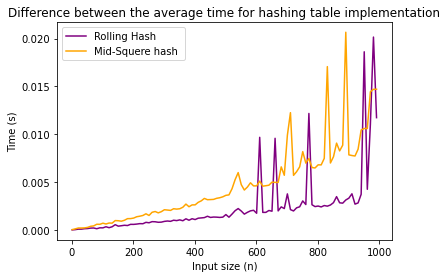

In [47]:

# plotting code here
import time
import matplotlib.pyplot as plt
import numpy as np
#Hold teh times
rh_time = []
reg_time = []
#Hold the total number of collisions


for n in range(3,1000,10):
    averh = []
    averg = []
    for i in range(100):
        collisions = 0
        #p = activity_list_gen(n)
        #standarized the x and y to have the same input
        x = ran_mword(n)
        y = ran_mword(n)
        a = time.time()
        rh_get_match(x,y,3)
        b = time.time()
        regular_get_match(x,y,3)
        c = time.time()
        averh.append(b-a)
        averg.append(c-b)
    rh_time.append(np.mean(averh))
    reg_time.append(np.mean(averg))

x =  list(range(1,1000,10))


plt.plot(x,rh_time, label ="Rolling Hash", color = "purple")
plt.plot(x,reg_time, label = "Mid-Squere hash ", color = "orange")
plt.xlabel("Input size (n)")
plt.ylabel("Time (s)")
plt.title("Difference between the average time for hashing table implementation")
plt.legend()
plt.show()



Time complexity analysis of rolling hash

The main parts that form the rolling hash function are:

- The construction of the hash table/Inserting and searching: After analyzing the load factor and determining that it is less than 1, we can say that the average time that it will take to O(1), to perform the insertion and the search. This time complexity comes as a result of the low likelihood of collisions, which are the main factor in increasing the time complexity of the table itself. If the load factor was bigger (i.e., > 1), the collisions would use higher amounts of the linked lists the insertion and search could increase to O(n), performing significantly worst.

- Divide the substrings and hashing: The division into sublists requires us to go thru each element of the list to get teh subdivisions of size k, so our time complexity will be O(n), where n represents the length of the string we are evaluating, for x and for y because they are done independently. However, the big determinant of the time complexity of the function is how the hashing function; the use of rolling hashing allows us to save time by avoiding needing the rehash the whole string (i.e., using teh analogy of dynamic programming where the repeated results are stored, here the previous computation is stored and used to perform the following ones, thus reducing the time complexity). Given that the update is only a mathematical operation (that is, inside the for loop use used to calculate the O(n) for the subdivisions), we still use the O(n) for the total time complexity. Even when we know that inside this function, the insertion to the hashing table is called for each value subdivisions, given the previously established value of O(1) for the search and the insertion, we can consider it as a constant (that asymptotically would generate the big-O that we established before, and it's not dependant on the value of the input). 

Compared with the usual Rabin-Karp algorithm (that requires the comparison inside the function), and has a time complexity of O(mn) where m is the length of the pattern is compared to (k in our case), and n the length of the string, we reduce it to O(n) by performing the comparison thru a hash table. Taking everything into consideration and knowing that the hashing happens for both strings, our time complexity is O(x) + O(y) + O(1) (where x and y represent the length of the respective strings). Thus the time complexity would depend on the longer string (i.e., simplified, it would still be O(n))


For the regular hashing, performed with a "mid-square" hashing function, the hash table has the same time complexity (given that we used the same code). The calculation of teh time complexity is dependant on the divisions of the other functions; the division of the string into substrings is still O(n), however, know to hash the substring, we would need to call the "mid-hash" function, that is dependant on the length of the substring (that by the definition of our code, we know it is k, and that will need to be calculated from scratch for each substring), giving us a time complexity of O(nk) (even when the mid square function calls the function to find the 3 middle numbers, it only has operations that are independent on the input so we can omit it given the time complexity of O(1)); This time complexity of O(nk), means that if n==k the time complexity will be O(n^2) representing the worst scenario for the function. Just as before or total time complexity becomes: O(xk) + O(yk) + O(1), that asymptotically will behave as O(nk).


The experimental analysis shows that as suggested by their respective time complexity analysis, the "mid-square" hashing will have a higher time complexity; however, it's important to note two things. First, the value of k remains constant throughout the analysis, trying to maintain a small enough length for the substring (intended to maximize the number of buckets in the hash table while maintaining k as a value that could represent a bigger number of words than words with only 2 letters for example) and the values of x and y will have the same length. Second, that rolling hash had a bigger number of collisions than teh mid-square hash, but still performed the comparisons faster and given the calculation of the size of the table had a lower loading value, so the decision on which hashing algorithm to use will depend on the priorities of the problem.


# Q5

***HCs*** 


- #ethicalconsiderations: I go in-depth about the considerations that the use of a plagiarism detector (particularly this one) has in real life and how bias towards technologies could be detrimental for a fair judgment. I explain the multiple ways that the output could be interpreted and how if it's not presented and interpreted correctly, it can cause more problems than being a helpful tool. I also presented different ways we could try to mitigate the detrimental effects that the code could have.

- #connotation: Following the ethical considerations, I talked about how the different associations of words ("plagiarism vs. match) can have on how the code is received and used. I explain how those interpretations lead to different uses for the code (and how it's crucial for ethical considerations). 

- #audience: Given that it's meant to be used, I explain how different presentations of teh work to the same audience (denoted as evaluators, to encompass a wide range of scenarios) will alter the use and how to lead us to tailor the message to mitigate possible biases (including a warning about the use of the detector and what it really entails).

- #confidence: I explain the importance of leading the reader to know the confidence level they should have on the result (and thus how to analyze it properly. Inside the code, I explain the downfalls of the implementations and how they affect the reliance we should have on what the code is implying (e.g., the permutations of words)

- #strategize: To decide on what is the best way to implement the has tables in a real-world context, I needed to determine the strengths and weaknesses of different hash functions (i.e., table implementations) and find ways to exploit their strengths and mitigate the crucial weaknesses (e.g., reduction of time complexity by using a hash table, utilize a percentage threshold to avoid misinterpretations, etc.). In the context of the code, I altered the Rabin-Karp algorithm to maximize its advantages, like the faster hashing calculation due to updating, and mitigate some of its downside (switching to a hash table vs. direct comparison to reduce the time complexity). 


***LOs*** 

- #ComplexityAnalysis: I explain how the different parts of the code affect the time complexity, how the load factor (calculated on average, given the change of table size for the rolling hash algorithm depending on the size of the input and subdivisions) affect the time complexity, how the different collisions could affect the efficiency of the code (and how other factors can take precedence given the limitations, like the preestablish size for the mid-square. 

- #CodeReadability: I wrote the appropriate docstring for each function (being sure to include the inputs and outputs), thoroughly commented to code to guide any possible reader, and named the descriptive variable names (or the conventions used in the pamphlets, books, or other resources). 

- #PythonProgramming: The graphs are presented to show the average of the function, representing the difference between the different time complexities. The code possesses docstrings that indicate how to use the code and what its outputs are. I created multiple tests to assess teh functionality of teh code under different conditions (relevant to the use, assuming read of text in human language). 

- #Computationalcritique: I explain in detail (between the justification of the code and their time analysis comparison) teh benefits and drawbacks for each implementation, explaining which would be better in different contexts. I explain how the modification of the hash table class from the pamphlet and the Rabin-Karp algorithm was the best approach in comparison to their original form. 

- #DataStructures: The main goal of the assignment is to understand the benefits of the hash table in this context, which is particularly highlighted when the comparison between the original rolling hash algorithm and the use of the hash table for the comparison is made showing the significant advantage of the table. 

***Reflection*** 

Looking back at the beginning of the semester, my understanding of what LO implies has grown, which is particularly obvious with the #complexityanalysis LO. At the beginning of the semester, I didn't have a clear understanding of what the LO entailed, but as the time progressed, I started to understand the nuances, like understanding recursive relationships, analyzing teh time complexity from the code (taking into account the functions inside a function, a concept that I somewhat struggled to fully analyzed until later on in the semester), and understand that even its important to understand it will not give you the full information for the code and different context might prioritize different benefits (e.g., space complexity). Overall, the LO's helped me to gain the basics to better understand computational concepts that will help me optimize future code and applications. 

#### References


- Christin, A., Rosenblat, A., & Boyd, D. (n.d.). Courts and Predictive Algorithms. http://www.law.nyu.edu/sites/default/files/upload_documents/Angele%20Christin.pdfCormen
- T- . H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to algorithms (3rd ed.). Mit Press.
- Nguyen, H., & Tran, Q. (2021). “All you need to know about hashing (to build a plagiarism detector).
- ”Rabin-Karp Algorithm for Pattern Searching - GeeksforGeeks. (2011, May 18). GeeksforGeeks. https://www.geeksforgeeks.org/rabin-karp-algorithm-for-pattern-searching/
- What is hashing and what are different hashing functions.  OR  Short note on hashing. (2021). Ques10.com. https://www.ques10.com/p/35017/what-is-hashing-and-what-are-different-hashing-fun/